In [46]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## 1. Load and format the data

We're going to load the iris data from the scikit "datasets" package

In [47]:
iris = datasets.load_iris()

#### 1.1 Define the variables

Define your "X" and "y" variables for the analysis

In [48]:
X, y = iris.data, iris.target

#### 1.2 Standardize X 

In [49]:
X = StandardScaler().fit_transform(X)

## 2. Visualize the Data

## 3. DBSCAN

#### 3.1 Setup the DBSCAN from scikit

Let's set up the DBSCAN from scikit using an epsilon of .5 and a minimum sample number of 5

In [56]:
db = DBSCAN(eps=0.5, min_samples=5, random_state=5).fit(X)

/Users/michaelmainzer/anaconda/lib/python2.7/site-packages/sklearn/cluster/dbscan_.py:116: DeprecationWarning: The parameter random_state is deprecated in 0.16 and will be removed in version 0.18. DBSCAN is deterministic except for rare border cases.
  category=DeprecationWarning)


#### 3.2 Labels

Next, we'll find the labels calculated by DBSCAN

In [57]:
core_samples = db.core_sample_indices_
labels = db.labels_

**What information can we derive from the lables?**: The negative one labels are assigned to noisy samples 

In [58]:
core_samples

array([  0,   1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  17,
        19,  20,  21,  23,  24,  25,  26,  27,  28,  29,  30,  31,  34,
        35,  36,  37,  38,  39,  40,  42,  43,  44,  45,  46,  47,  48,
        49,  52,  54,  55,  58,  61,  63,  64,  65,  66,  67,  69,  71,
        73,  74,  75,  77,  78,  79,  80,  81,  82,  83,  86,  88,  89,
        90,  91,  92,  94,  95,  96,  97,  99, 101, 103, 104, 110, 111,
       112, 116, 120, 123, 126, 133, 137, 138, 139, 140, 141, 142, 143,
       145, 147])

In [59]:
labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,
        0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1, -1, -1,  1, -1, -1,  1, -1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1, -1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1, -1,  1, -1,  1,
        1,  1,  1, -1, -1, -1, -1, -1,  1,  1,  1,  1, -1,  1,  1, -1, -1,
       -1,  1,  1, -1,  1,  1, -1,  1,  1,  1, -1, -1, -1,  1,  1,  1, -1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1])

Now, we can use a handy chunk of code from the Scitkit documentation to measure the performance of our model 

In [54]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(y, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(y, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

Estimated number of clusters: 2
Homogeneity: 0.489
Completeness: 0.510
V-measure: 0.500
Adjusted Rand Index: 0.428
Adjusted Mutual Information: 0.483
Silhouette Coefficient: 0.349


**What do these metrics tell us?**

#### 3.3 Plot the resulting clusters

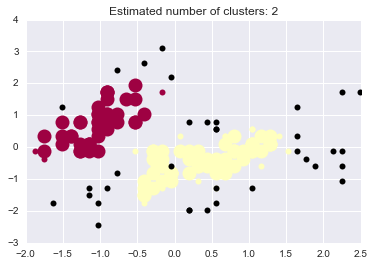

In [55]:
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()